In [9]:
import sys
sys.path.append("../model/active_contour/")
sys.path.append("../utils/")

import cv2
import numpy as np

import matplotlib.pyplot as plt

from gradient_vector_flow import _getEdgeMap, _calcGradient, GVFSnake

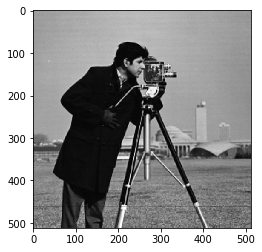

In [10]:
# Load sample image
imsample_cameraman= cv2.imread("../asset/cameraman.png").astype(np.uint8)

plt.imshow(imsample_cameraman)

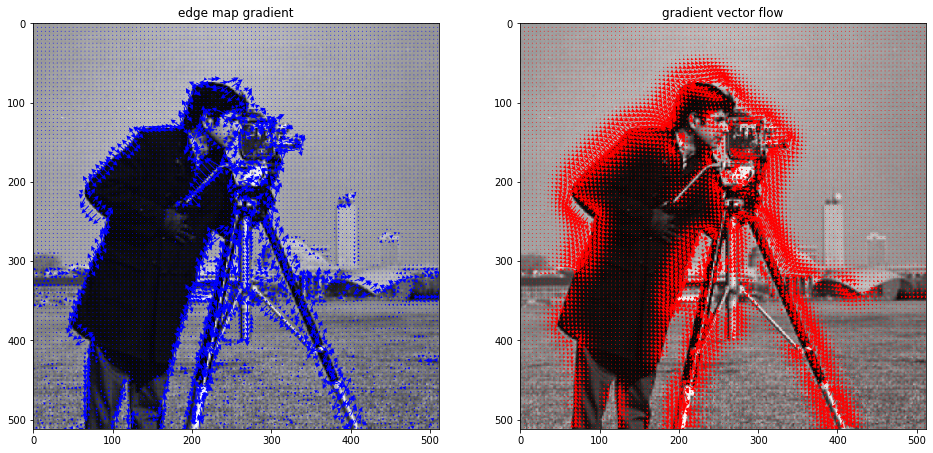

In [14]:
def drawVectorField(image, grad, gvf):
    # Define plot components
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    
    # Set title
    axes[0].set_title("edge map gradient")
    axes[1].set_title("gradient vector flow")
    
    # Get input dimensions
    height, width, _ = image.shape
    
    # Grid indice
    ii, jj = np.meshgrid(range(0, height, 5),
                         range(0, width, 5),
                         indexing="ij")

    # Get scale values
    scale_grad = 20.*np.sqrt(np.max(grad[0]**2. + grad[1]**2))
    scale_gvf = 20.*np.sqrt(np.max(gvf[0]**2. + gvf[1]**2))     
    
    # Plot
    axes[0].imshow(image, cmap="gray")
    axes[1].imshow(image, cmap="gray")
    axes[0].quiver(ii, jj, grad[0][jj, ii], -grad[1][jj, ii], scale=scale_grad, color="blue", headwidth=5)
    axes[1].quiver(ii, jj, gvf[0][jj, ii], -gvf[1][jj, ii], scale=scale_gvf, color="red", headwidth=5)

# Normalize image domain
image = imsample_cameraman[..., 0]
norm = (image - image.min())/(image.max() - image.min())

# Evaluate image energies
edge = _getEdgeMap(norm)

# Evaluate gradient of edge map
fx, fy = _calcGradient(edge)

# Get GVF
model = GVFSnake()
gx, gy = model.getGradientVectorFlow(fx, fy)

# Plot
drawVectorField(imsample_cameraman, (fx, fy), (gx, gy))

In [ ]:
## GVF Snake model

# Add seed points
seed = np.zeros_like(imsample_cameraman[..., 0])
seed[50:400, 50:300] = 1

# Define model
model = GVFSnake()

# Run
_, contour = model.run(imsample_cameraman[..., 0], seed)

# Plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
axes.scatter(contour[:, 1], contour[:, 0], color="blue")
axes.plot(contour[:, 1], contour[:, 0], color="blue")
axes.imshow(imsample_cameraman)